In [264]:
import pandas as pd

In [265]:
import numpy as np

In [266]:
pip install keras

In [267]:
pip install tensorflow

In [268]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [269]:
#    Load Data

In [270]:
gstock_data = pd.read_csv("C:\\Users\\laksh\\OneDrive\\Desktop\\NFLX.csv")
gstock_data .head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [271]:
 gstock_data.head()
 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [272]:
 gstock_data.describe()



,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
cm = sns.light_palette("Darkblue",  as_cmap=True)
gstock_data.head(5).style.background_gradient(cmap=cm)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [275]:
gstock_data = gstock_data [['Date','Open','Close']] 

In [276]:
gstock_data 

,Date,Open,Close
0,2018-02-05,262.000000,254.259995
1,2018-02-06,247.699997,265.720001
2,2018-02-07,266.579987,264.559998
3,2018-02-08,267.079987,250.100006
4,2018-02-09,253.850006,249.470001
...,...,...,...
1004,2022-01-31,401.970001,427.140015
1005,2022-02-01,432.959991,457.130005
1006,2022-02-02,448.250000,429.480011
1007,2022-02-03,421.440002,405.600006


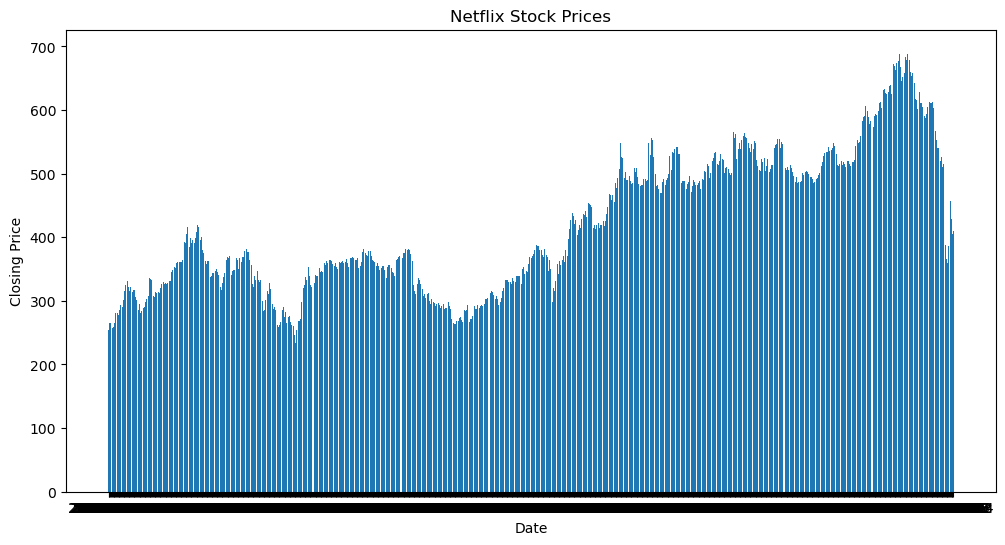

In [277]:
# Create bar chart of daily stock prices
plt.figure(figsize=(12, 6))
plt.bar(gstock_data['Date'], gstock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Netflix Stock Prices')
plt.show()


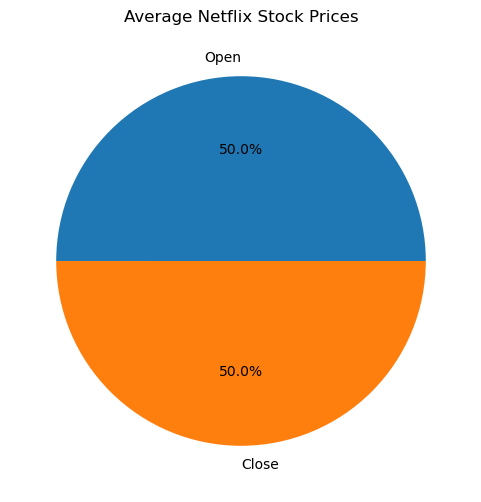

In [278]:
# Create pie chart of daily stock prices
plt.figure(figsize=(6, 6))
labels = ['Open', 'Close']
sizes = [gstock_data['Open'].mean(), gstock_data['Close'].mean()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Average Netflix Stock Prices')
plt.show()


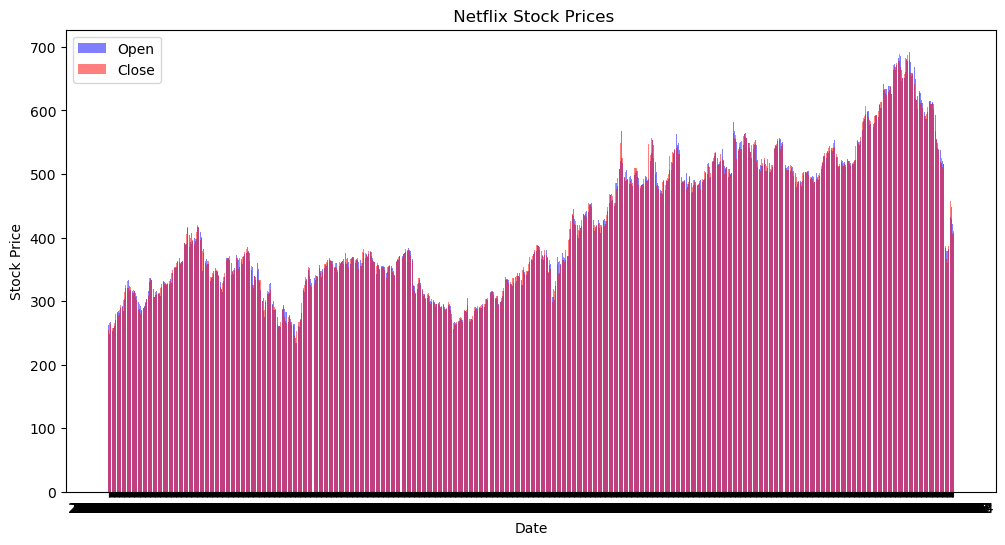

In [279]:
# Create column chart of daily stock prices
plt.figure(figsize=(12, 6))
x = gstock_data['Date']
y1 = gstock_data['Open']
y2 = gstock_data['Close']
plt.bar(x, y1, color='blue', alpha=0.5)
plt.bar(x, y2, color='red', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(' Netflix Stock Prices')
plt.legend(['Open', 'Close'])
plt.show()

In [280]:
# Pre Process

In [281]:
scaler = MinMaxScaler(feature_range=(0, 1))
gstock_data['Scaled Close'] = scaler.fit_transform(gstock_data['Close'].values.reshape(-1, 1))


In [282]:
gstock_data

,Date,Open,Close,Scaled Close
0,2018-02-05,262.000000,254.259995,0.044516
1,2018-02-06,247.699997,265.720001,0.069548
2,2018-02-07,266.579987,264.559998,0.067015
3,2018-02-08,267.079987,250.100006,0.035430
4,2018-02-09,253.850006,249.470001,0.034053
...,...,...,...,...
1004,2022-01-31,401.970001,427.140015,0.422140
1005,2022-02-01,432.959991,457.130005,0.487648
1006,2022-02-02,448.250000,429.480011,0.427251
1007,2022-02-03,421.440002,405.600006,0.375090


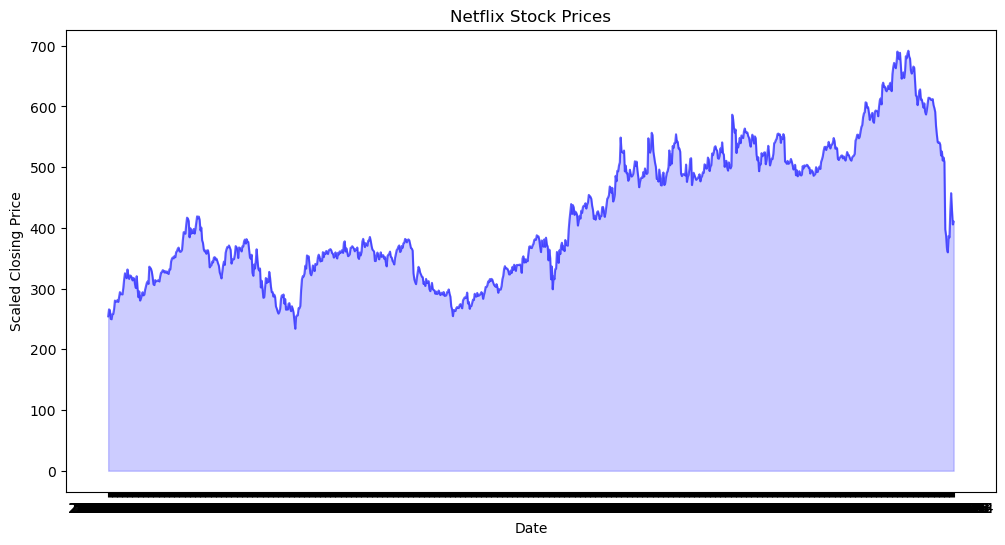

In [283]:
# Create ribbon chart of daily stock prices
plt.figure(figsize=(12, 6))
x = gstock_data['Date']
y = gstock_data['Close']
plt.fill_between(x, y, color='blue', alpha=0.2)
plt.plot(x, y, color='blue', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Scaled Closing Price')
plt.title('Netflix Stock Prices')
plt.show()

In [284]:
# Split data into training and testing sets

In [285]:
train_size = int(len(gstock_data) * 0.8)
train_data = gstock_data.iloc[:train_size, :]
test_data = gstock_data.iloc[train_size:, :]

In [286]:
train_size


807

In [287]:
train_data

,Date,Open,Close,Scaled Close
0,2018-02-05,262.000000,254.259995,0.044516
1,2018-02-06,247.699997,265.720001,0.069548
2,2018-02-07,266.579987,264.559998,0.067015
3,2018-02-08,267.079987,250.100006,0.035430
4,2018-02-09,253.850006,249.470001,0.034053
...,...,...,...,...
802,2021-04-14,554.869995,540.020020,0.668705
803,2021-04-15,544.169983,549.219971,0.688801
804,2021-04-16,550.539978,546.539978,0.682947
805,2021-04-19,546.900024,554.440002,0.700203


In [288]:
test_data

,Date,Open,Close,Scaled Close
807,2021-04-21,508.000000,508.899994,0.600730
808,2021-04-22,513.820007,508.779999,0.600467
809,2021-04-23,509.010010,505.549988,0.593412
810,2021-04-26,506.760010,510.299988,0.603788
811,2021-04-27,512.619995,505.549988,0.593412
...,...,...,...,...
1004,2022-01-31,401.970001,427.140015,0.422140
1005,2022-02-01,432.959991,457.130005,0.487648
1006,2022-02-02,448.250000,429.480011,0.427251
1007,2022-02-03,421.440002,405.600006,0.375090


In [289]:
# Create sequences of historical stock prices

In [290]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
train_X, train_y = create_sequences(train_data['Scaled Close'].values.reshape(-1, 1), seq_length)
test_X, test_y = create_sequences(test_data['Scaled Close'].values.reshape(-1, 1), seq_length)


In [291]:
create_sequences

<function __main__.create_sequences(data, seq_length)>

In [292]:
train_X

array([[0.04451626, 0.06954849, 0.06701469, ..., 0.17011425, 0.17164323,
        0.17347804],
       [0.06954849, 0.06701469, 0.03542955, ..., 0.17164323, 0.17347804,
        0.1736091 ],
       [0.06701469, 0.03542955, 0.03405342, ..., 0.17347804, 0.1736091 ,
        0.16996133],
       ...,
       [0.76988276, 0.75568473, 0.72364077, ..., 0.69865223, 0.6687054 ,
        0.68880096],
       [0.75568473, 0.72364077, 0.70531449, ..., 0.6687054 , 0.68880096,
        0.68294702],
       [0.72364077, 0.70531449, 0.71656362, ..., 0.68880096, 0.68294702,
        0.70020314]])

In [293]:
train_y

array([0.1736091 , 0.16996133, 0.18830954, 0.20178678, 0.20316291,
       0.21061135, 0.20908237, 0.2022236 , 0.20674514, 0.20150281,
       0.20600248, 0.19951508, 0.19724337, 0.21393155, 0.21349466,
       0.24210916, 0.25209149, 0.25646011, 0.25305259, 0.26137482,
       0.25713724, 0.27533254, 0.27943906, 0.28815444, 0.29175861,
       0.27854348, 0.27673053, 0.27865273, 0.28385134, 0.31901878,
       0.34728379, 0.34533979, 0.34188853, 0.37373584, 0.39946704,
       0.39658373, 0.38708196, 0.32895744, 0.36152555, 0.34186674,
       0.35285382, 0.34413837, 0.35888248, 0.34215064, 0.35934124,
       0.38087852, 0.40429435, 0.39699876, 0.40359536, 0.39234616,
       0.35368381, 0.36390644, 0.31803588, 0.30853411, 0.28472512,
       0.27777896, 0.28129573, 0.26963151, 0.28175442, 0.28223497,
       0.26502258, 0.22079026, 0.22622924, 0.22826063, 0.24162861,
       0.23854872, 0.25565193, 0.25763959, 0.24842179, 0.25224434,
       0.24462111, 0.23466065, 0.22631656, 0.20209255, 0.19344

In [294]:
test_X

array([[0.60072954, 0.60046743, 0.59341208, ..., 0.67014698, 0.68602697,
        0.67510541],
       [0.60046743, 0.59341208, 0.60378756, ..., 0.68602697, 0.67510541,
        0.64749567],
       [0.59341208, 0.60378756, 0.59341208, ..., 0.67510541, 0.64749567,
        0.65179884],
       ...,
       [0.8995871 , 0.9121033 , 0.92202003, ..., 0.32869527, 0.42214021,
        0.48764772],
       [0.9121033 , 0.92202003, 0.90218643, ..., 0.42214021, 0.48764772,
        0.4272515 ],
       [0.92202003, 0.90218643, 0.92549314, ..., 0.48764772, 0.4272515 ,
        0.37509011]])

In [295]:
test_y

array([0.64749567, 0.65179884, 0.64911204, 0.61106136, 0.60699851,
       0.61494937, 0.61730846, 0.62259446, 0.62344637, 0.61241562,
       0.61966756, 0.61438156, 0.60492345, 0.61918694, 0.63565674,
       0.62617677, 0.62490983, 0.61588874, 0.6083747 , 0.604705  ,
       0.61606339, 0.62043201, 0.62259446, 0.62906007, 0.67676551,
       0.68368974, 0.69777859, 0.69795323, 0.68521879, 0.69076689,
       0.70998882, 0.72584695, 0.73242175, 0.7605557 , 0.77471   ,
       0.77903503, 0.81437719, 0.81293547, 0.79434695, 0.79692442,
       0.77632637, 0.75114132, 0.76230312, 0.77023219, 0.77645742,
       0.74605183, 0.74104981, 0.77929713, 0.78499816, 0.78309782,
       0.7836439 , 0.76444371, 0.79766714, 0.82230625, 0.82844416,
       0.8070378 , 0.87575631, 0.88512696, 0.8692907 , 0.87105998,
       0.85878416, 0.85419716, 0.86472556, 0.87355013, 0.86151455,
       0.88265868, 0.88490858, 0.85463405, 0.91583838, 0.94122022,
       0.95624816, 0.94938952, 0.93715729, 0.9614687 , 0.99698

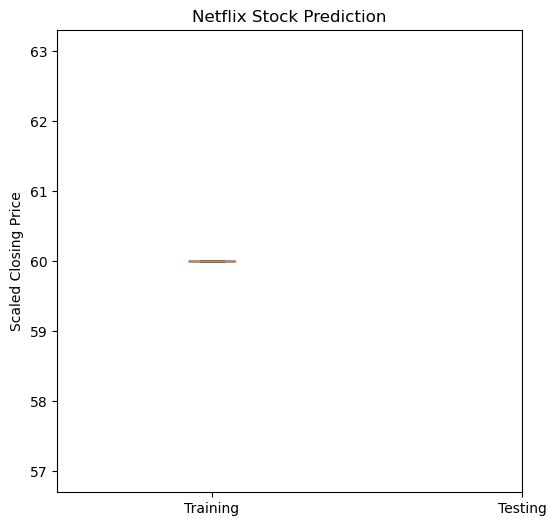

In [296]:
# Create box plot of training and testing sequence lengths
plt.figure(figsize=(6, 6))
plt.boxplot([train_X.shape[1], test_X.shape[1]])
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Scaled Closing Price')
plt.title('Netflix Stock Prediction')
plt.show()

In [297]:
# Build LSTM model

In [298]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(train_X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [299]:
model

In [300]:
# Compile model

In [301]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [302]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [303]:
# Train model

In [44]:
model.fit(train_X, train_y, batch_size=128, epochs=25)

Epoch 1/25
6/6 [==============================] - 1s 223ms/step - loss: 0.0015
Epoch 2/25
6/6 [==============================] - 1s 220ms/step - loss: 0.0015
Epoch 3/25
6/6 [==============================] - 1s 217ms/step - loss: 0.0015
Epoch 4/25
6/6 [==============================] - 1s 219ms/step - loss: 0.0015
Epoch 5/25
6/6 [==============================] - 1s 224ms/step - loss: 0.0015
Epoch 6/25
6/6 [==============================] - 1s 225ms/step - loss: 0.0015
Epoch 7/25
6/6 [==============================] - 1s 222ms/step - loss: 0.0015
Epoch 8/25
6/6 [==============================] - 1s 206ms/step - loss: 0.0014
Epoch 9/25
6/6 [==============================] - 1s 205ms/step - loss: 0.0015
Epoch 10/25
6/6 [==============================] - 1s 204ms/step - loss: 0.0015
Epoch 11/25
6/6 [==============================] - 1s 211ms/step - loss: 0.0015
Epoch 12/25
6/6 [==============================] - 1s 218ms/step - loss: 0.0014
Epoch 13/25
6/6 [==============================] 

In [45]:
# Evaluate model on testing set

In [46]:
test_loss = model.evaluate(test_X, test_y)
print('Test loss:', test_loss)

5/5 [==============================] - 4s 26ms/step - loss: 0.0034
Test loss: 0.0033644025679677725


In [47]:
# Make predictions on new data

In [57]:
new_X = np.array([0.5, 0.6, 0.7]).reshape(-1, 1)
new_data_scaled = scaler.transform(new_X)

In [58]:
new_y = []

In [59]:
new_X = np.array(new_X, dtype=np.float32)

In [63]:
for i in range(seq_length, seq_length+len(new_X)):
    new_X.append(new_data_scaled[i-seq_length:i, 0])
new_X = np.array(new_X)

In [65]:
new_X

array([], dtype=float32)

In [142]:
test_predicted = model.predict(test_X)

 


5/5 [==============================] - 0s 33ms/step


In [146]:
test_dates = test_data['Date'][seq_length:].reset_index(drop=True)

In [147]:
test_dates

0      2021-07-16
1      2021-07-19
2      2021-07-20
3      2021-07-21
4      2021-07-22
          ...    
137    2022-01-31
138    2022-02-01
139    2022-02-02
140    2022-02-03
141    2022-02-04
Name: Date, Length: 142, dtype: object

In [148]:
# Inverse transform predicted output values to their original form
predicted_output_inverse = scaler.inverse_transform(test_predicted)

In [149]:
predicted_output_inverse

array([[541.93854],
       [541.2887 ],
       [540.04224],
       [538.4152 ],
       [534.51263],
       [529.78314],
       [525.6109 ],
       [522.28424],
       [520.0732 ],
       [518.7336 ],
       [517.3737 ],
       [516.6496 ],
       [516.01855],
       [514.9998 ],
       [514.7804 ],
       [515.9194 ],
       [517.0447 ],
       [518.02893],
       [518.3211 ],
       [517.82465],
       [516.787  ],
       [516.25354],
       [516.2472 ],
       [516.6309 ],
       [517.5524 ],
       [521.429  ],
       [526.6529 ],
       [532.8392 ],
       [538.8073 ],
       [543.2357 ],
       [546.7346 ],
       [550.4487 ],
       [554.68945],
       [559.023  ],
       [564.56274],
       [570.8036 ],
       [576.87164],
       [584.27905],
       [591.228  ],
       [595.9545 ],
       [599.1892 ],
       [599.91473],
       [597.7466 ],
       [595.10333],
       [592.88513],
       [591.44324],
       [588.63104],
       [585.2849 ],
       [584.41425],
       [585.0618 ],


In [150]:
# Flatten test_predictions to match shape of test_data['Close'][seq_length:]
Actual =  test_data['Close'][seq_length:].reset_index(drop=True)


In [151]:
 Actual

0      530.309998
1      532.280029
2      531.049988
3      513.630005
4      511.769989
          ...    
137    427.140015
138    457.130005
139    429.480011
140    405.600006
141    410.170013
Name: Close, Length: 142, dtype: float64

In [168]:
 

Predicted = pd.Series(test_predicted_1d, index=test_dates)
 

In [169]:
Predicted

Date
2021-07-16    0.672896
2021-07-19    0.671477
2021-07-20    0.668754
2021-07-21    0.665200
2021-07-22    0.656675
                ...   
2022-01-31    0.354078
2022-02-01    0.344077
2022-02-02    0.352824
2022-02-03    0.363921
2022-02-04    0.369867
Length: 142, dtype: float32

In [170]:
# Compare predicted output values to actual output values for test data


In [171]:
mse = np.mean((predicted_output_inverse-test_predicted )**2)
print('Mean Squared Error:', mse)

Mean Squared Error: 343079.22


In [172]:

gstock_data_pred_actual = np.concatenate([test_predicted.reshape(-1, 1),  predicted_output_inverse.reshape(-1, 1)], axis=0)

In [173]:
gstock_data_pred_actual

array([[6.7289603e-01],
       [6.7147654e-01],
       [6.6875392e-01],
       [6.6520000e-01],
       [6.5667546e-01],
       [6.4634478e-01],
       [6.3723141e-01],
       [6.2996489e-01],
       [6.2513530e-01],
       [6.2220919e-01],
       [6.1923879e-01],
       [6.1765712e-01],
       [6.1627865e-01],
       [6.1405349e-01],
       [6.1357415e-01],
       [6.1606210e-01],
       [6.1852002e-01],
       [6.2067002e-01],
       [6.2130827e-01],
       [6.2022376e-01],
       [6.1795712e-01],
       [6.1679196e-01],
       [6.1677814e-01],
       [6.1761636e-01],
       [6.1962920e-01],
       [6.2809688e-01],
       [6.3950741e-01],
       [6.5302014e-01],
       [6.6605639e-01],
       [6.7572939e-01],
       [6.8337220e-01],
       [6.9148493e-01],
       [7.0074803e-01],
       [7.1021378e-01],
       [7.2231442e-01],
       [7.3594636e-01],
       [7.4920082e-01],
       [7.6538104e-01],
       [7.8055966e-01],
       [7.9088378e-01],
       [7.9794931e-01],
       [7.995340

In [175]:
gstock_data_pred_actual_columns= ['Actual', 'Predicted']

In [176]:
gstock_data_pred_actual_columns

['Actual', 'Predicted']

In [174]:
#  Visualization

In [164]:
# Merging actual and predicted data for better visualization

In [180]:
 
merged_gstock_data = pd.concat([test_dates, actual, predicted ], axis=1)
merged_gstock_data.columns = ['Date', 'Actual', 'Predicted']


NameError: name 'predicted_prices' is not defined

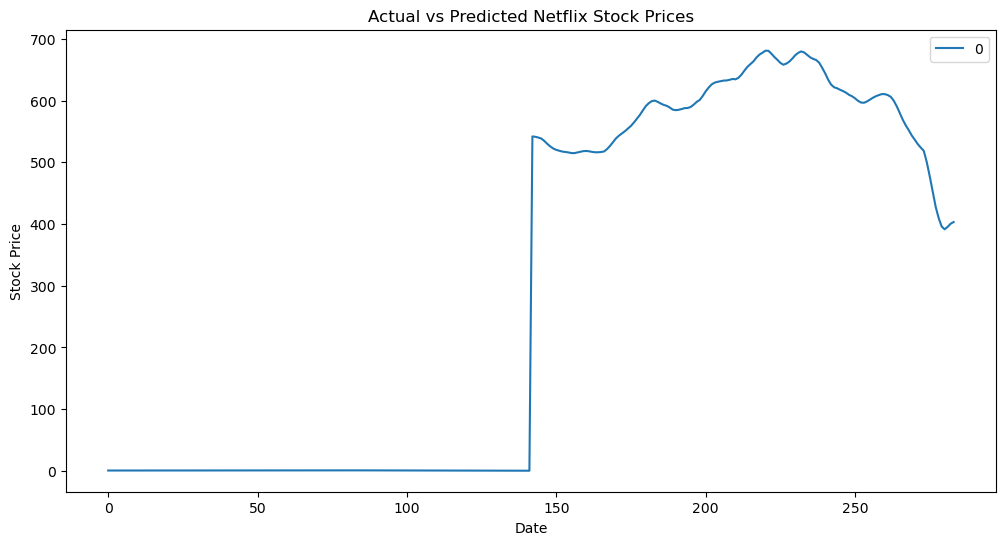

In [177]:
# Plot actual vs predicted stock prices
plt.figure(figsize=(12, 6))
sns.lineplot(data=gstock_data_pred_actual)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Netflix Stock Prices')
plt.show()


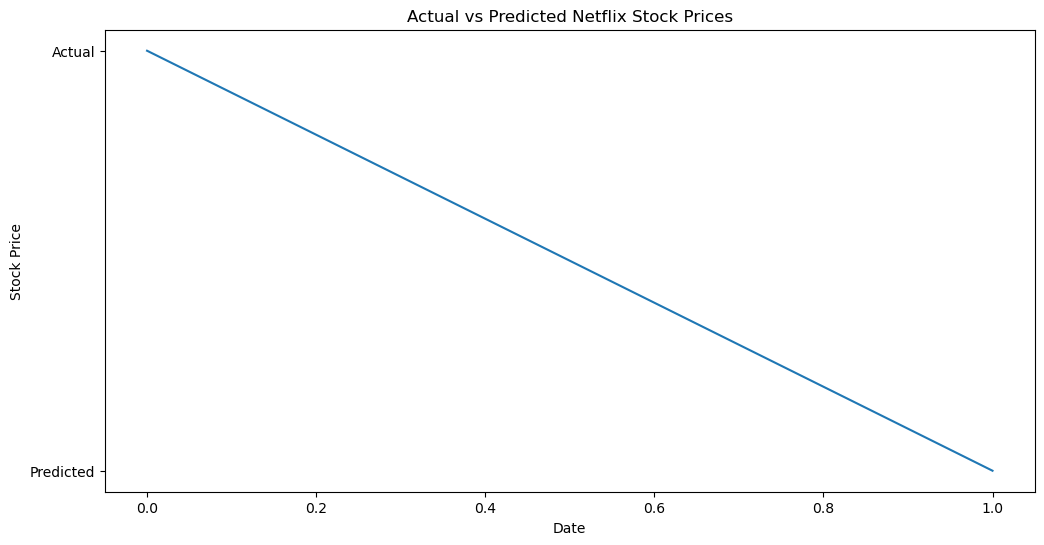

In [179]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=gstock_data_pred_actual_columns)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Netflix Stock Prices')
plt.show()